In [15]:
fimpsfile='../data/xtra-berlin/feature-importance.csv.gz'
FEATURESETS = ['f2f', 'f2fsr', 'sumpb', 'combi']
WID=4.5

import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

pd.set_option('display.max_rows', 200)
fimps = pd.read_csv(fimpsfile)
fimps

,split,featureset,cycle,confA,confB,feature,source,importance
0,class,combi,10,rggt_tree,gpw_gpw,c_avg_deg_cons,mdi,0.006194
1,class,combi,10,rggt_tree,gpw_gpw,c_avg_dom_cons,mdi,0.010411
2,class,combi,10,rggt_tree,gpw_gpw,c_avg_domdeg_cons,mdi,0.026076
3,class,combi,10,rggt_tree,gpw_gpw,c_bounds_d,mdi,0.000000
4,class,combi,10,rggt_tree,gpw_gpw,c_bounds_r,mdi,0.000000
...,...,...,...,...,...,...,...,...
739195,instance,sumpb,9,NaN,NaN,sarofe_sums_skew_min,perm,16.070200
739196,instance,sumpb,9,NaN,NaN,sarofe_sums_skew_mn,perm,55.606000
739197,instance,sumpb,9,NaN,NaN,sarofe_sums_wsum_iqr,perm,40.366600
739198,instance,sumpb,9,NaN,NaN,sarofe_sums_wsum_skew,perm,-17.400200


In [16]:
fimps.loc[fimps.source=='perm'].groupby(['split','featureset','feature'])['importance'].describe()

count         mean           std  \
split    featureset feature                                                   
class    combi      c_avg_deg_cons          50.0  -817.740898  12891.043821   
                    c_avg_dom_cons          50.0  -646.691204   5317.437310   
                    c_avg_domdeg_cons       50.0 -1810.101994  12295.399496   
                    c_bounds_d              50.0     0.000000      0.000000   
                    c_bounds_r              50.0     0.000000      0.000000   
...                                          ...          ...           ...   
instance sumpb      sarofe_sums_skew_min    50.0  -206.988192   3128.439989   
                    sarofe_sums_skew_mn     50.0 -1334.377256   9613.616842   
                    sarofe_sums_wsum_iqr    50.0  1266.615106   7033.923556   
                    sarofe_sums_wsum_skew   50.0   458.426026   3969.384098   
                    sarofe_sums_wsum_sum    50.0 -1026.520816   5713.117764   

                                                  min         25%     50%  \
split    featureset feature                                                 
class    combi      c_avg_deg_cons        -35678.1366 -261.447450 -3.1764   
                    c_avg_dom_cons        -28613.3736  -96.998850 -0.7625   
                    c_avg_domdeg_cons     -70150.6898  -86.871350  0.5828   
                    c_bounds_d                 0.0000    0.000000  0.0000   
                    c_bounds_r                 0.0000    0.000000  0.0000   
...                                               ...         ...     ...   
instance sumpb      sarofe_sums_skew_min  -20623.2146   -1.191050  0.5997   
                    sarofe_sums_skew_mn   -35224.3854   -7.324900  0.7904   
                    sarofe_sums_wsum_iqr  -11833.5990    0.006100  8.3250   
                    sarofe_sums_wsum_skew  -7147.0498   -5.689750  0.4114   
                    sarofe_sums_wsum_sum  -34104.6118  -11.074475  5.4798   

                                                 75%         max  
split    featureset feature                                       
class    combi      c_avg_deg_cons          45.43020  48242.5034  
                    c_avg_dom_cons         223.88565  14264.7474  
                    c_avg_domdeg_cons       98.33690  20696.8922  
                    c_bounds_d               0.00000      0.0000  
                    c_bounds_r               0.00000      0.0000  
...                                              ...         ...  
instance sumpb      sarofe_sums_skew_min    14.69940   7196.2344  
                    sarofe_sums_skew_mn     16.62690  33699.8992  
                    sarofe_sums_wsum_iqr    56.96205  35978.6596  
                    sarofe_sums_wsum_skew   33.73270  26960.1434  
                    sarofe_sums_wsum_sum    25.08145   6709.5638  

[924 rows x 8 columns]

In [17]:
fromto = {
    r'sarofe_sums_' : 'li_',
    r'sarofe_pbs_' : 'pb_'
}
for f,t in fromto.items():
    fimps['feature'] = fimps.feature.str.replace(re.compile(f),t)
fimps['featureset'] = fimps.featureset.str.replace(re.compile(r'sumpb'),'lipb')

In [18]:
sns.set(
        context="paper", style="ticks", font_scale=0.7,
        rc={
            "font.family": "sans-serif",
            "grid.linewidth": 0.2,
            "text.usetex" : False,
        }
)
_meanprops = {"marker":"D",
              "markerfacecolor":"white",
              "markeredgecolor":"black",
              "markersize" : 3,
              "markeredgewidth" : 0.5}

def _shorten(data):
    data['feature'] = data.feature.str.replace(re.compile('_amogs_'),'_amo_')
    data['feature'] = data.feature.str.replace(re.compile('_amo_size_mn_r2n_'),'_asize_r2n_')
    data['feature'] = data.feature.str.replace(re.compile('_amo_size_'),'_asize_')
    data['feature'] = data.feature.str.replace(re.compile('_amo_maxw_'),'_amaxw_')

def _prepFimpData(fimps, n_feats, source):
    _fimps = fimps.loc[fimps.source==source].drop(columns=['source'])
    mean_fimps = _fimps.groupby(['split','featureset','feature'])['importance'].mean().reset_index()
    mean_fimps['keep'] = mean_fimps.groupby(['split','featureset'])['importance'].transform(
        lambda x:x.rank(ascending=False) <= n_feats
    )
    df=_fimps.merge(
        mean_fimps.loc[mean_fimps.keep,['featureset','feature','split']],
        on=['featureset','feature','split']
    )
    _shorten(df)
    return df
    
def plot_for_slides(fimps, n_feats, source, split, fsets=None, outfile=None):
    data = _prepFimpData(fimps, n_feats, source)
    fig,axs = plt.subplots(1,len(fsets),figsize=(9,4))
    for col,fset in enumerate(fsets):
        _d = data.loc[(data.split==split)&(data.featureset==fset)]
        _m = _d.loc[:,['feature','importance']].groupby(['feature']).mean()
        _o =_m.sort_values('importance', ascending=False).index
        ax = axs[col]
        g = sns.boxplot(data=_d, y='feature', x='importance', ax=ax, order=_o,
                        showmeans=True, meanprops=_meanprops, showfliers=False,
                        linewidth=0.8)
        g.set(
            title=r"$\bf{"+fset +  r"}$, split by $\bf{"+split+"}$",
            ylabel="Feature" if col==0 else None,
            xlabel="Cost (seconds)"
        )
        ax.grid(axis='y', color="#888888", linestyle="--", linewidth=0.5)
        ax.tick_params(axis='both', which='both',  width=0.5)
        

    sns.despine(fig)
    fig.tight_layout()
    plt.show()
    if outfile:
        fig.savefig(outfile,dpi=1200)

        
def plot_for_poster(fimps, n_feats, source, split, fsets=None, outfile=None):
    data = _prepFimpData(fimps, n_feats, source)
    data.feature = data.feature.str.replace('_',r'\_')
    
    DK_COL='#1e2730'
    LT_COL='#ccd500'
    sns.set(
        context="paper", style="ticks", font_scale=1.5,
    )
    plt.rcParams.update({
    "text.usetex" : True,
    "font.family": "sans-serif",
    "font.sans-serif" : ['Fira'],
    "grid.linewidth": 0.1,
    "lines.linewidth" : 1,
        "lines.color" : DK_COL,
    })
   
    fig,axs = plt.subplots(1,len(fsets),figsize=(9,3))
    for col,fset in enumerate(fsets):
        _d = data.loc[(data.split==split)&(data.featureset==fset)]
        _m = _d.loc[:,['feature','importance']].groupby(['feature']).mean()
        _o =_m.sort_values('importance', ascending=False).index
        ax = axs[col]
        g = sns.boxplot(data=_d, y='feature', x='importance', ax=ax, order=_o,
                        showmeans=True,
                        meanprops=_meanprops,
                        showfliers=False, color=LT_COL, saturation=1,
                       )
        g.set(
            title=r"$\bf{"+fset +  r"}$ features, split by $\bf{"+split+"}$",
            ylabel="Feature" if col==0 else None,
            xlabel="Cost (seconds)"
        )
        ax.grid(axis='y', color="#888888", linestyle="--", linewidth=0.5)
        ax.tick_params(axis='both', which='both',  width=0.5)
        

    sns.despine(fig)
    fig.tight_layout()
    plt.show()
    if outfile:
        fig.savefig(outfile,dpi=1200)

    
def plot_importance(fimps, n_feats, source, fsets=None, outfile=None, width_height=(WID,WID)):
    data = _prepFimpData(fimps, n_feats, source)
    if fsets is None:
        fsets = data.featureset.unique().tolist()
    fig,axs = plt.subplots(len(fsets),2,figsize=width_height)
    for row,fset in enumerate(fsets):
        for col,split in enumerate(['instance','class']):
            _d = data.loc[(data.split==split)&(data.featureset==fset)]
            _m = _d.loc[:,['feature','importance']].groupby(['feature']).mean()
            _o =_m.sort_values('importance', ascending=False).index
            ax = axs[row,col]
            g = sns.boxplot(data=_d, y='feature', x='importance', ax=ax, order=_o,
                            showmeans=True,
                            meanprops=_meanprops,
                            showfliers=False, whis=1.5,
                            linewidth=0.5)
            g.set(
                title=r"$\bf{"+fset +  r"}$, split by $\bf{"+split+"}$",
                ylabel=None,
                xlabel="Cost (seconds)"if row==len(fsets)-1 else None
            )
            ax.grid(axis='x', color="#cccccc", linestyle="--", linewidth=0.5)
            ax.grid(axis='y', color="#cccccc", linestyle="--", linewidth=0.5)
            ax.tick_params(axis='both', which='both', labelsize=6, width=0.5)

    sns.despine(fig)
    fig.tight_layout()
    plt.show()
    if outfile:
        fig.savefig(outfile,dpi=1200)


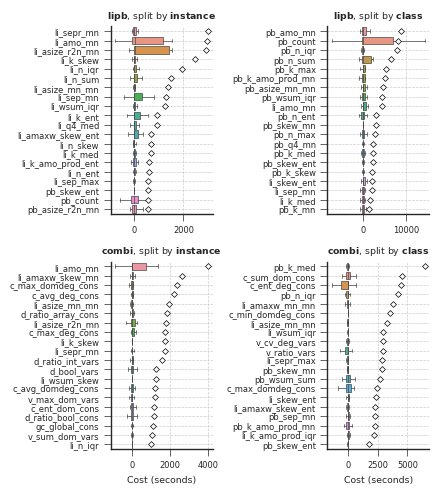

In [19]:
plot_importance(fimps, 20,'perm',fsets=['lipb','combi'],outfile='img/pfi.pdf',width_height=(WID,1.1*WID))

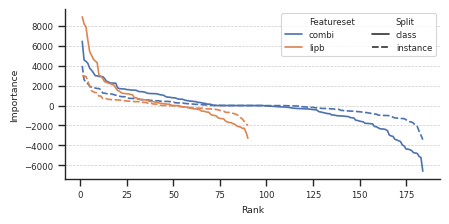

In [40]:
def plotFullDist(fimps, n_feats, source, fsets=None, outfile=None, width_height=(WID,WID)):
    data = _prepFimpData(fimps, n_feats, source)
    if fsets:
        data = data.loc[data.featureset.isin(fsets)]    
    mn_fimps = data.groupby(['split','featureset','feature'])['importance'].mean().reset_index()
    mn_fimps['rank'] = mn_fimps.groupby(['split','featureset'])['importance'].rank('first',ascending=False).astype(int)
    fig,ax = plt.subplots(figsize=width_height)
    mn_fimps = mn_fimps.rename(columns={c:c.capitalize() for c in mn_fimps.columns})
    sns.lineplot(ax=ax, data=mn_fimps,style='Split',hue='Featureset',x='Rank',y='Importance')
    ax.grid(axis='y', color="#cccccc", linestyle="--", linewidth=0.5)
    sns.move_legend(ax,loc='upper right',bbox_to_anchor=(1,1),ncol=2)
    sns.despine(fig)
    fig.tight_layout()
    plt.show()
    if outfile:
        fig.savefig(outfile,dpi=1200)

plotFullDist(fimps,1e6,'perm',['lipb','combi'],width_height=(WID,0.5*WID),outfile='/tmp/pfi-all-means.pdf')

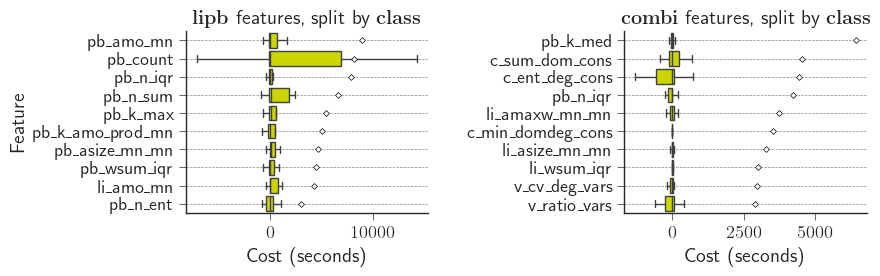

In [10]:
plot_for_poster(fimps, 10, 'perm', 'class', fsets=['lipb','combi'], outfile='/tmp/pfi-poster.pdf')

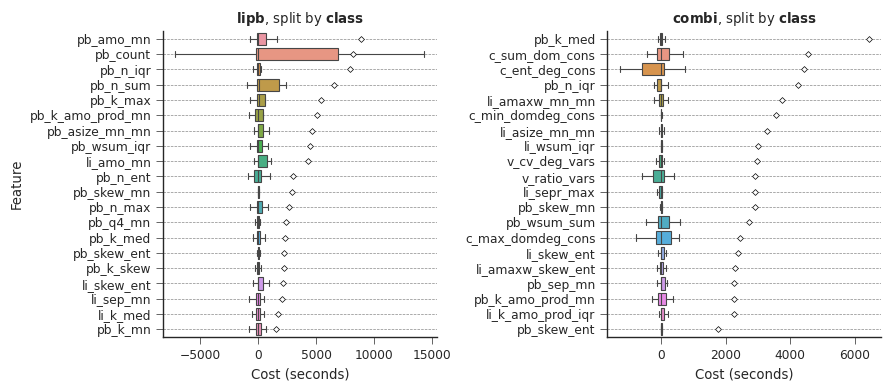

In [11]:
sns.set(
        context="paper", style="ticks", #font_scale=0.6,
        rc={
            "font.family": "sans-serif",
            "grid.linewidth": 0.1,
            "text.usetex" : False,
        }
)
plot_for_slides(fimps, 20, 'perm', 'class', fsets=['lipb','combi'], outfile='img/pfi-slides.pdf')